<a href="https://colab.research.google.com/github/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/blob/data-analysis/AsianicLaptopPrices(UPDATED).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
df = pd.read_csv('https://raw.githubusercontent.com/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/main/CSV%20Files/laptop_ph_prices.csv')
df.head()

,ProductDescription,Prices
0,Lenovo Ideapad Slim 1 14IJL7 Intel Celeron N4...,"₱ 19,995\n\n"
1,Lenovo IDEAPAD 1 14IJL7 82LV0026PH Intel Cele...,"₱ 20,999\n\n"
2,HP 14S-DQ0509TU Intel Celeron N4120\nIntel Ce...,"₱ 21,990\n\n"
3,Asus X415MA-BV373W Intel Celeron N4020\nIntel...,"₱ 21,995\n\n"
4,Acer Aspire 3 A314-35-C6Y8 Intel Celeron N450...,"₱ 21,995\n\n"


In [158]:
df['Brand'] = df['ProductDescription'].apply(lambda text: text.split()[0])
df.head()

,ProductDescription,Prices,Brand
0,Lenovo Ideapad Slim 1 14IJL7 Intel Celeron N4...,"₱ 19,995\n\n",Lenovo
1,Lenovo IDEAPAD 1 14IJL7 82LV0026PH Intel Cele...,"₱ 20,999\n\n",Lenovo
2,HP 14S-DQ0509TU Intel Celeron N4120\nIntel Ce...,"₱ 21,990\n\n",HP
3,Asus X415MA-BV373W Intel Celeron N4020\nIntel...,"₱ 21,995\n\n",Asus
4,Acer Aspire 3 A314-35-C6Y8 Intel Celeron N450...,"₱ 21,995\n\n",Acer


In [159]:
df['Prices'] = df['Prices'].str.replace('₱', '')
df['Prices'] = df['Prices'].str.replace(',', '') 
df['Prices'] = df['Prices'].str.replace('\n\n', '') 
df['Prices'] = df['Prices'].astype('int32')

In [160]:
df.head()

,ProductDescription,Prices,Brand
0,Lenovo Ideapad Slim 1 14IJL7 Intel Celeron N4...,19995,Lenovo
1,Lenovo IDEAPAD 1 14IJL7 82LV0026PH Intel Cele...,20999,Lenovo
2,HP 14S-DQ0509TU Intel Celeron N4120\nIntel Ce...,21990,HP
3,Asus X415MA-BV373W Intel Celeron N4020\nIntel...,21995,Asus
4,Acer Aspire 3 A314-35-C6Y8 Intel Celeron N450...,21995,Acer


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


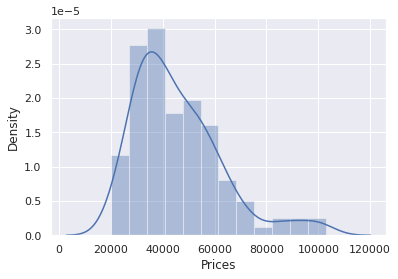

In [161]:
sns.distplot(df['Prices'], kde=True)

In [162]:
df['Brand'] = df['Brand'].str.replace('ASUS', 'Asus') 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


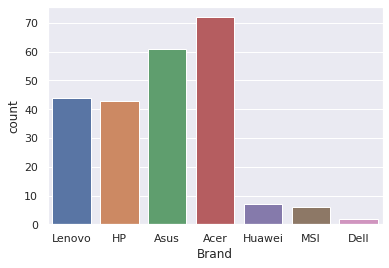

In [163]:
sns.countplot(df['Brand'])

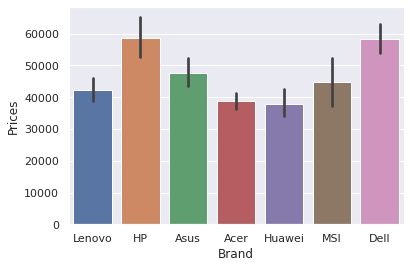

In [164]:
sns.barplot(x=df['Brand'], y=df['Prices'])

In [165]:
# Get the proper format for the processor type

def processorType(text):
  text1 = 'Intel Core i7'
  text2 = 'Intel Core i5'
  text3 = 'Intel Core i3'
  text4 = 'Intel Celeron'
  text5 = 'Intel Pentium'
  text6 = 'AMD Ryzen 3'
  text7 = 'AMD Ryzen 5'
  text8 = 'AMD Ryzen 7'
  text9 = 'AMD Ryzen 9'

  textDef = 'Others'
  
  if text1.lower() in text.lower():
    return text1
  
  elif text2.lower() in text.lower():
    return text2
  
  elif text3.lower() in text.lower():
    return text3

  elif text4.lower() in text.lower():
    return text4
  
  elif text5.lower() in text.lower():
    return text5
  
  elif text6.lower() in text.lower():
    return text6
  
  elif text7.lower() in text.lower():
    return text7
  
  elif text8.lower() in text.lower():
    return text8
  
  elif text9.lower() in text.lower():
    return text9
  
  else:
    return textDef
  



In [166]:
# Apply the changes to our dataframe

df['CPU_name'] = df['ProductDescription'].apply(lambda text:processorType(text))
df.head()
df.sample(10)


,ProductDescription,Prices,Brand,CPU_name
140,Lenovo Yoga 6 - 13ALC6 - Amd Ryzen 5 - 5500U\...,46995,Lenovo,AMD Ryzen 5
132,Acer Aspire 5 A515-56G-579G Intel Core i5 11t...,44499,Acer,Intel Core i5
146,Acer Aspire 5 A514-54G-70XQ Intel Core i7 11t...,47999,Acer,Intel Core i7
164,Asus Zenbook 13 OLED UM325UA-KG138WS AMD Ryze...,51995,Asus,AMD Ryzen 7
108,Huawei Matebook D14 WAQ9BR AMD Rzyen 5 3500H\...,39999,Huawei,AMD Ryzen 5
125,Acer Aspire 5 A515-56G-56AZ Intel Core i5 11t...,42999,Acer,Intel Core i5
80,Acer Aspire 5 A514-54-56M0 Intel Core i5 11th...,34999,Acer,Intel Core i5
135,Acer TravelMate P214-52-54G1 Intel Core i5 10...,44990,Acer,Intel Core i5
78,Huawei Matebook D15- 11G- Intel Core i3- 1135...,34999,Huawei,Intel Core i3
45,HP 15s-DU1537TU Intel Core i3 10th Gen\nIntel...,31990,HP,Intel Core i3


In [167]:
df['CPU_name'].value_counts()

Intel Core i5    84
Intel Core i3    56
Intel Core i7    35
AMD Ryzen 5      19
Intel Pentium    11
Intel Celeron    10
AMD Ryzen 3       9
AMD Ryzen 7       9
Others            2
Name: CPU_name, dtype: int64

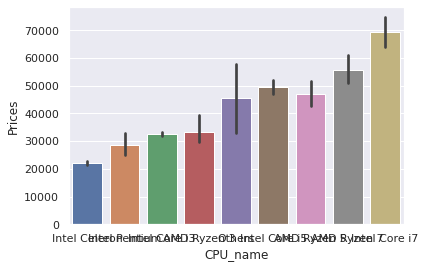

In [168]:
sns.barplot(x=df['CPU_name'], y=df['Prices'])
sns.set(rc={'figure.figsize':(11.7,6.27)})

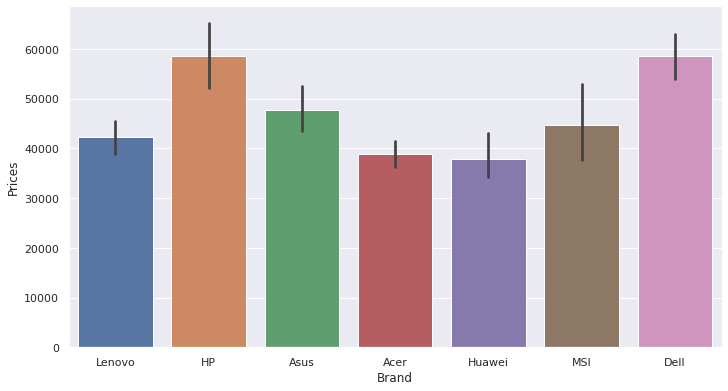

In [169]:
sns.barplot(x=df['Brand'], y=df['Prices'])
sns.set(rc={'figure.figsize':(11.7,6.27)})

In [170]:

# Get the proper format for the processor type

def ramType(text):
  text1 = ['4 gb','4GB DDR4', '4GB of DDR4', '4GB of onboard DDR4 memory', ' 4GB Soldered DDR4', '4GB Soldered', '4GB (1x 4GB onboard)',
           '4GB LPDDR4X on board']
  fourGB = [x.lower() for x in text1]
  text2 = [ '4GB+4GB (Onboard) DDR4 Memory', '4GB Soldered DDR4-2666 + 4GB DDR4-2666', '4GB DDR4 onboard, 4GB DDR4 SO-DIMM up to 12GB max'
   ,'4GB DDR4 on board + 4GB DDR4 SO-DIMM', '4GB Soldered DDR4-3200 + 4GB SO-DIMM DDR4-3200', '4GB Soldered DDR4 + 4GB SO-DIMM DDR4', 
   '8GB DDR4', '8GB of DDR4', '8GB onboard DDR4', '8GB DDR4-3200', ' 8gb', '8 gb',  '8G DDR4', '8GB of onboard LPDDR4X', '4G OB+4G DDR4', 
   '4GB Soldered DDR4 + 4GB SO-DIMM DDR4']
  eightGB = [x.lower() for x in text2]
  text3 = ['16GB', '16gb ddr5'] 
  sixtGB = [x.lower() for x in text3] 
  text4 = ['12GB'] 
  twelveGB = [x.lower() for x in text4] 

  textDef = 'Others'
  

  if any(x in text.lower() for x in fourGB):
    return '4GB'
  
  elif any(x in text.lower() for x in eightGB):
    return '8GB'
  
  elif any(x in text.lower() for x in sixtGB):
    return '16GB'
  
  else:
    return 'Others'


  



In [171]:
# Apply the changes to our dataframe

df['RAM'] = df['ProductDescription'].apply(lambda text:ramType(text))
df.head()
df.sample(5)


,ProductDescription,Prices,Brand,CPU_name,RAM
122,Lenovo IdeaPad Slim 3i 15ITL6 82H801V7PH Inte...,42995,Lenovo,Intel Core i5,8GB
54,Lenovo Slim 3i - 14ITL08 (81X700ERPH) Intel C...,31995,Lenovo,Intel Core i3,4GB
201,HP Pavilion 15-EG1029TU Intel Core i7 11th Ge...,62990,HP,Intel Core i7,8GB
46,Asus X415EA-EK659W Intel Core i3 11th Gen\nIn...,31995,Asus,Intel Core i3,4GB
130,Asus Vivobook 14 X1402ZA- EB136WS Intel Core ...,43995,Asus,Intel Core i5,8GB


In [172]:
df['RAM'].value_counts()

8GB       118
4GB        73
16GB       37
Others      7
Name: RAM, dtype: int64

In [173]:
df.loc[df['RAM'] == 'Others']

,ProductDescription,Prices,Brand,CPU_name,RAM
24,Acer Aspire 3 A315-58- 39ww Intel Core I3- 1...,28999,Acer,Intel Core i3,Others
33,Acer Aspire 3 A315-59-30AL Intel Core i3 12th...,29999,Acer,Intel Core i3,Others
50,Asus Vivobook X515EA-BQ2124WS Intel Core i3 1...,31995,Asus,Intel Core i3,Others
60,Asus X415EA-EB1552WS Intel Core i3 11th Gen\n...,32495,Asus,Intel Core i3,Others
62,Huawei MatePad Pro (Midnight Grey) MRX - AL09...,32999,Huawei,Others,Others
78,Huawei Matebook D15- 11G- Intel Core i3- 1135...,34999,Huawei,Intel Core i3,Others
175,Acer Aspire 6 A615-51G-59EA Captain America E...,54990,Acer,Intel Core i5,Others


In [174]:
df.sample(2)

,ProductDescription,Prices,Brand,CPU_name,RAM
183,HP ENVY Notebook x360 13-AY0119AU AMD Ryzen 3...,55990,HP,AMD Ryzen 3,8GB
117,Asus X415JP-EK181T Intel Core i5 10th Gen\nIn...,41995,Asus,Intel Core i5,8GB


In [175]:
df['CPU_name'].value_counts()

Intel Core i5    84
Intel Core i3    56
Intel Core i7    35
AMD Ryzen 5      19
Intel Pentium    11
Intel Celeron    10
AMD Ryzen 3       9
AMD Ryzen 7       9
Others            2
Name: CPU_name, dtype: int64

In [176]:
df = df[['Brand', 'CPU_name', 'RAM', 'Prices']]
df.head()

,Brand,CPU_name,RAM,Prices
0,Lenovo,Intel Celeron,4GB,19995
1,Lenovo,Intel Celeron,4GB,20999
2,HP,Intel Celeron,4GB,21990
3,Asus,Intel Celeron,4GB,21995
4,Acer,Intel Celeron,4GB,21995


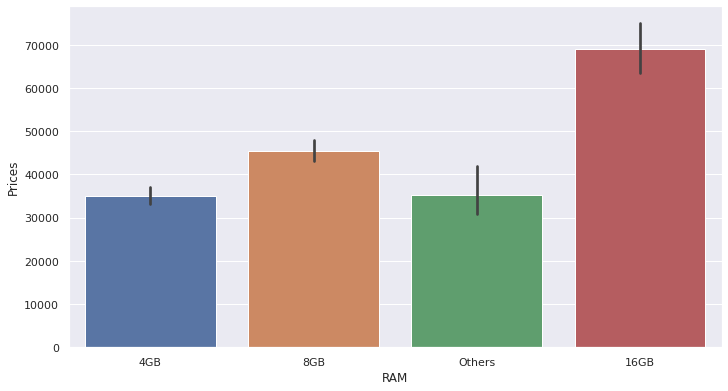

In [177]:
sns.barplot(x=df['RAM'], y=df['Prices'])
sns.set(rc={'figure.figsize':(11.7,6.27)})

In [178]:
# Save as CSV File

df.to_csv('laptop_ph_prices_updated.csv', index=False)
